In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelmax, argrelextrema
from scipy.signal import find_peaks
from scipy.fft import fft

from onesidedcoupling import OnesidedCoupling

# Inital Parameters

In [4]:
t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 8000, t_step)
keep = int(t_last / t_step)
k = 0.1
gamma = 0.2
mu = 2
beta = 3

In [10]:
OnesidedCoupling((1,1,1,1), t, keep, k, gamma, mu, beta, 2).duffvdpsolver()[-1]
    

array([1.95054703, 0.0336041 , 0.46331275, 0.06376829])

In [ ]:
x0, y0, p0, q0 = [], [], [], []
x1, y1, p1, q1 = [], [], [], []
par0 = 1, 0.5, 1, 0.5
alpha_up = np.arange(0.5, 6, 0.05)   
alpha_down = alpha_up[::-1]  

amplitudes_up = []

for alpha in alpha_up:
    lilie = OnesidedCoupling(par0, t, keep, k, gamma, mu, beta, alpha)
    
    sol = lilie.duffvdpsolver()[-1]
    maxima = [np.argmax(lilie.duffvdpsolver()[-keep:, i]) for i in range(len(par0))]
    peak = [find_peaks(lilie.duffvdpsolver()[-keep:, i], height=(np.repeat(lilie.duffvdpsolver()[-keep:, i][maxima[i]], keep)- np.repeat(lilie.duffvdpsolver()[-keep:, i][maxima[i]]*0.01, keep), np.repeat(lilie.duffvdpsolver()[-keep:, i][maxima[i]], keep))) for i in range(len(par0))]
    amplitudes_up.append(np.mean(peak[1][1]['peak_heights'][-10:]))

amplitudes_down = []
par1 = 0.5, 0.5, 0.5, 0.5

for alpha in alpha_down:
    lilie = OnesidedCoupling(par1, t, keep, k, gamma, mu, beta, alpha)
    sol = lilie.duffvdpsolver()[-1]
    maxima = [np.argmax(lilie.duffvdpsolver()[-keep:, i]) for i in range(len(par0))]
    peak = [find_peaks(lilie.duffvdpsolver()[-keep:, i], height=(np.repeat(lilie.duffvdpsolver()[-keep:, i][maxima[i]], keep)- np.repeat(lilie.duffvdpsolver()[-keep:, i][maxima[i]]*0.01, keep), np.repeat(lilie.duffvdpsolver()[-keep:, i][maxima[i]], keep))) for i in range(len(par0))]
    amplitudes_down.append(np.mean(peak[1][1]['peak_heights'][-10:]))

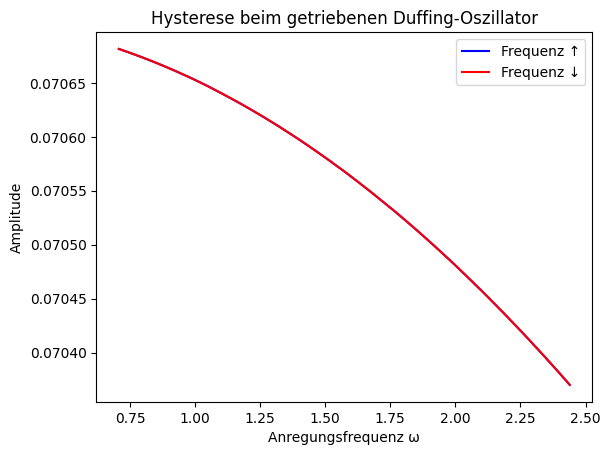

In [20]:
plt.plot(np.sqrt(alpha_up), amplitudes_up, label="Frequenz ↑", color="blue")
plt.plot(np.sqrt(alpha_down), amplitudes_down, label="Frequenz ↓", color="red")

plt.xlabel("Anregungsfrequenz ω")
plt.ylabel("Amplitude")
plt.title("Hysterese beim getriebenen Duffing-Oszillator")
plt.legend()
plt.show()